# Asignación 9

## Linealizacion de datos y método polinomial



In [142]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


t = np.array([0, 1, 3, 5, 7, 9])  # Tiempo en horas
y = np.array([1, 0.891, 0.708, 0.562, 0.447, 0.355])  # Valores de sigma

### Para la transformación de data
#### se convierte la expresión exponencial en logaritmica, para encontrar $z$ y $a_0$

In [143]:

N = len(t)
sum_xi = np.sum(t)
sum_xi2 = np.sum(t**2)
sum_tz = np.sum(t * z)
sum_z = np.sum(z)


a1 = (N * sum_tz - sum_xi * sum_z) / (N * sum_xi2 - sum_xi**2)
a0 = (sum_z - a1 * sum_xi) / N


A_exp = np.exp(a0)
lambda_exp = a1


fxiexp = A_exp * np.exp(lambda_exp * t)


sr_exp = np.sum((y - fxiexp)**2)

## Modelo Polinomial
### se definen las sumas
### se define la matriz del sistema de ecuaciones, el vector de terminos independientes, como tambien se le pide las solucion de las matrices. Por último calcular el SR y asi determinar que método es mejor para la curva

In [144]:

# ----- Modelo Polinomial -----

# Calcular las sumas necesarias para el sistema de ecuaciones
sum_xi3 = np.sum(t**3)
sum_xi4 = np.sum(t**4)

sum_y = np.sum(y)
sum_t = np.sum(t * y)
sum_t2 = np.sum(t**2 * y)


A = np.array([
    [N, sum_xi, sum_xi2],
    [sum_xi, sum_xi2, sum_xi3],
    [sum_xi2, sum_xi3, sum_xi4]
])


B = np.array([sum_y, sum_t, sum_t2])


a0_poly, a1_poly, a2_poly = np.linalg.solve(A, B)


fxipoli = a0_poly + a1_poly * t + a2_poly * t**2


sr_poly = np.sum((y - fxipoli)**2)


### Tabla de resultados 
### Criterio de comparación para determinar que método es mas eficiente para la curva
### Gráfica


Tabla de Resultados:
 Iteración   t (Tiempo)          y    z = ln(y)      t * z        t^2   Predicción Exp  Predicción Poly
         1            0      1.000        0.000      0.000          0            1.000            0.997
         2            1      0.891       -0.115     -0.115          1            0.891            0.894
         3            3      0.708       -0.345     -1.036          9            0.708            0.711
         4            5      0.562       -0.576     -2.881         25            0.562            0.561
         5            7      0.447       -0.805     -5.636         49            0.447            0.443
         6            9      0.355       -1.036     -9.321         81            0.355            0.357
 Sumatoria            -      3.963       -2.878    -18.990     71.971                -                -

Parámetros del modelo exponencial:
a1 (exp) = -0.1150
a1_poly = -0.1074
Suma de los cuadrados de los residuos (SR):
Modelo exponencial: SR = 2.90

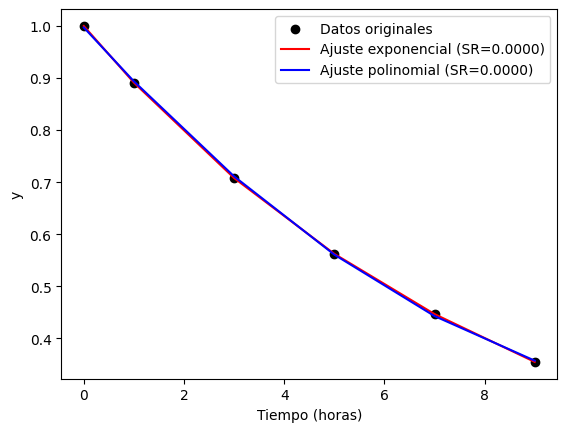

In [145]:
print("\nTabla de Resultados:")
print(f"{'Iteración':>10} {'t (Tiempo)':>12} {'y':>10} {'z = ln(y)':>12} {'t * z':>10} {'t^2':>10} {'Predicción Exp':>16} {'Predicción Poly':>16}")
for i in range(N):
    print(f"{i + 1:>10} {t[i]:>12} {y[i]:>10.3f} {z[i]:>12.3f} {t[i] * z[i]:>10.3f} {t[i]**2:>10} {predicciones_exp[i]:>16.3f} {predicciones_poly[i]:>16.3f}")
    

print(f"{'Sumatoria':>10} {'-':>12} {np.sum(y):>10.3f} {sum_z:>12.3f} {sum_tz:>10.3f} {sum_t2:>10} {'-':>16} {'-':>16}")


print("\nParámetros del modelo exponencial:")
print(f"a1 (exp) = {a1:.4f}")
print(f"a1_poly = {a1_poly:.4f}")

print(f"Suma de los cuadrados de los residuos (SR):")
print(f"Modelo exponencial: SR = {sr_exp:.4e}")
print(f"Modelo polinomial: SR = {sr_poly:.4e}")
if sr_exp < sr_poly:
    print("El modelo exponencial proporciona un mejor ajuste.")
else:
    print("El modelo polinomial proporciona un mejor ajuste.")
    
plt.scatter(t, y, label="Datos originales", color="black")
plt.plot(t, fxiexp, label=f"Ajuste exponencial (SR={sr_exp:.4f})", color="red")
plt.plot(t, fxipoli, label=f"Ajuste polinomial (SR={sr_poly:.4f})", color="blue")
plt.xlabel("Tiempo (horas)")
plt.ylabel("y")
plt.legend()
plt.show()